In [38]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [39]:
data = mogptk.Data()

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')

data.remove_range('A', start=2.0, end=None)

In [101]:
model = mogptk.SM(data, Q=3)
display(model.get_params())

[{'mixture_weights': 0.22844309636166601,
  'mixture_means': array([0.]),
  'mixture_scales': array([0.79656514])},
 {'mixture_weights': 0.22844309636166601,
  'mixture_means': array([15.17194586]),
  'mixture_scales': array([0.3795059])},
 {'mixture_weights': 0.22844309636166601,
  'mixture_means': array([5.26239139]),
  'mixture_scales': array([0.48660921])}]

In [102]:
model.estimate_from_bnse()
display(model.get_params())

[{'mixture_weights': 0.4264831366829295,
  'mixture_means': array([0.38482054]),
  'mixture_scales': array([0.79656514])},
 {'mixture_weights': 0.7976366768461562,
  'mixture_means': array([0.87459214]),
  'mixture_scales': array([0.3795059])},
 {'mixture_weights': 0.4264831366829295,
  'mixture_means': array([0.37187632]),
  'mixture_scales': array([0.48660921])}]

In [103]:
model.train()
display(model.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -18.034738
  Number of iterations: 108
  Number of functions evaluations: 138
Done


[{'mixture_weights': 1.0000614215345232e-06,
  'mixture_means': array([0.00026605]),
  'mixture_scales': array([1.44515031e-06])},
 {'mixture_weights': 0.5115190845180742,
  'mixture_means': array([0.95126793]),
  'mixture_scales': array([1.00012566e-06])},
 {'mixture_weights': 0.00033039558517377075,
  'mixture_means': array([0.42427178]),
  'mixture_scales': array([1.30789811e-05])}]

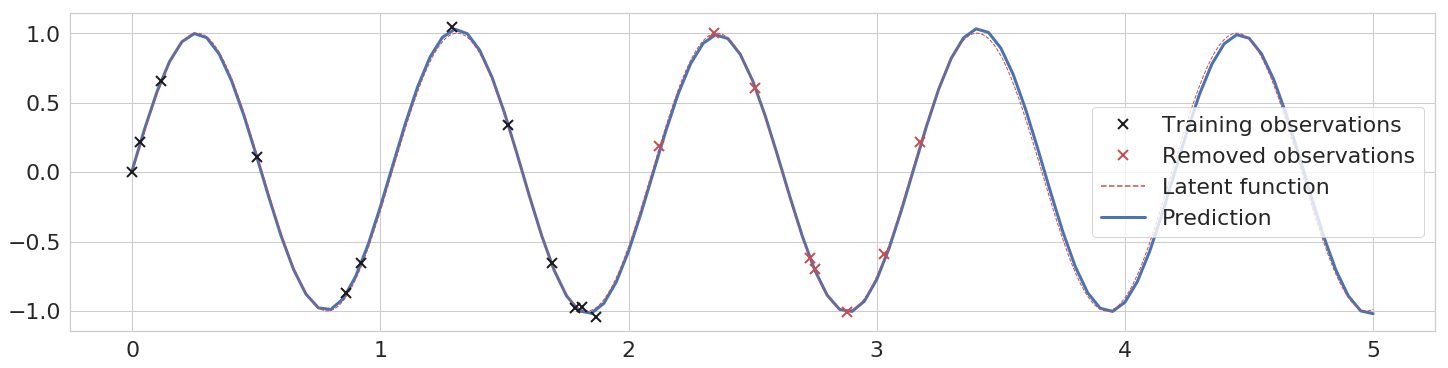

In [96]:
model.set_prediction_range(0, 0.0, 5.0, 0.05)
model.predict()
mogptk.plot(model)

In [105]:
model = mogptk.MOSM(data, Q=3)
display(model.get_params())

[{'magnitude': array([-1.78888904]),
  'mean': array([[0.15023849]]),
  'variance': array([[0.93629144]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.05314849])},
 {'magnitude': array([-0.77274345]),
  'mean': array([[-0.16847715]]),
  'variance': array([[0.00371234]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.00703584])},
 {'magnitude': array([1.35785034]),
  'mean': array([[-1.9440869]]),
  'variance': array([[0.77309993]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.57129459])}]

In [125]:
model.estimate_from_sm()
display(model.get_params())

Building...


Optimizing...
Optimization terminated successfully.
         Current function value: -17.392094
         Iterations: 39
         Function evaluations: 49
         Gradient evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Optimization terminated successfully.
  Objective function value: -17.392094
  Number of iterations: 39
  Number of functions evaluations: 49
Done
(1,) (1,)
(1,) (1,)
(1,) (1,)


[{'magnitude': array([0.00081543]),
  'mean': array([[3.72111164]]),
  'variance': array([[37.27416141]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.05314849])},
 {'magnitude': array([0.51185919]),
  'mean': array([[5.99105851]]),
  'variance': array([[1.00000011e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.00703584])},
 {'magnitude': array([1.e-06]),
  'mean': array([[2.85261523]]),
  'variance': array([[0.00031461]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([0.57129459])}]

In [127]:
model.train()

Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -25.464997
  Number of iterations: 203
  Number of functions evaluations: 283
Done


In [128]:
display(model.get_params())

[{'magnitude': array([0.03682827]),
  'mean': array([[-58.43944956]]),
  'variance': array([[0.27133906]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.e-06])},
 {'magnitude': array([13.49446083]),
  'mean': array([[6.00491208]]),
  'variance': array([[1.00000011e-06]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.e-06])},
 {'magnitude': array([0.10358045]),
  'mean': array([[2.51889907]]),
  'variance': array([[0.00014067]]),
  'delay': array([[0.]]),
  'phase': array([0.]),
  'noise': array([1.e-06])}]

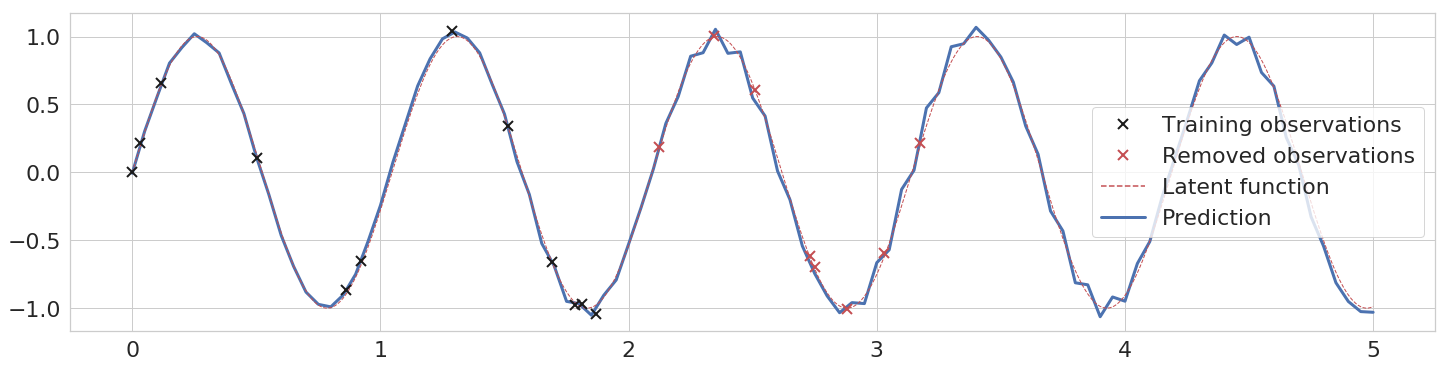

In [129]:
model.set_prediction_range(0, 0.0, 5.0, 0.05)
model.predict()
mogptk.plot(model)